#**Proyecto Análisis exploratorio Amsterdam Airbnb  a traves de Numpy, Pandas y Matplotlib**
##Mateo Borda

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
path = '/content/drive/MyDrive/Bases de datos/amsterdam_weekends.csv'
df = pd.read_csv(path)
df['Indice'] = df['Unnamed: 0']
df = df.drop(columns=['Unnamed: 0'])
df.head()

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,Indice
0,319.640053,Private room,False,True,2.0,False,0,1,9.0,88.0,1,4.763360,0.852117,110.906123,5.871971,136.982208,11.941560,4.84639,52.34137,0
1,347.995219,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748310,3.651591,75.275937,3.985516,95.386468,8.315410,4.97512,52.36103,1
2,482.975183,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384872,0.439852,493.272517,26.116521,875.114817,76.289005,4.89417,52.37663,2
3,485.552926,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544723,0.318688,552.849514,29.270850,815.303994,71.074937,4.90051,52.37508,3
4,2771.541724,Entire home/apt,False,False,4.0,True,0,0,10.0,100.0,3,1.686798,1.458399,208.809162,11.055489,272.315202,23.739349,4.88467,52.38749,4


Queremos conocer que nombres tienen nuestras variables

In [30]:
columns_names = df.columns
print(columns_names)

Index(['realSum', 'room_type', 'room_shared', 'room_private',
       'person_capacity', 'host_is_superhost', 'multi', 'biz',
       'cleanliness_rating', 'guest_satisfaction_overall', 'bedrooms', 'dist',
       'metro_dist', 'attr_index', 'attr_index_norm', 'rest_index',
       'rest_index_norm', 'lng', 'lat', 'Indice'],
      dtype='object')


Queremos saber que tipo de dato son las variables que tenemos

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977 entries, 0 to 976
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   realSum                     977 non-null    float64
 1   room_type                   977 non-null    object 
 2   room_shared                 977 non-null    bool   
 3   room_private                977 non-null    bool   
 4   person_capacity             977 non-null    float64
 5   host_is_superhost           977 non-null    bool   
 6   multi                       977 non-null    int64  
 7   biz                         977 non-null    int64  
 8   cleanliness_rating          977 non-null    float64
 9   guest_satisfaction_overall  977 non-null    float64
 10  bedrooms                    977 non-null    int64  
 11  dist                        977 non-null    float64
 12  metro_dist                  977 non-null    float64
 13  attr_index                  977 non

Vamos a validar que la base de datos no contenga datos faltantes en ninguna de sus variables

In [32]:
faltantes = df.isna().sum()
print(faltantes)

realSum                       0
room_type                     0
room_shared                   0
room_private                  0
person_capacity               0
host_is_superhost             0
multi                         0
biz                           0
cleanliness_rating            0
guest_satisfaction_overall    0
bedrooms                      0
dist                          0
metro_dist                    0
attr_index                    0
attr_index_norm               0
rest_index                    0
rest_index_norm               0
lng                           0
lat                           0
Indice                        0
dtype: int64


##Análisis del tipo de variables de la base de datos

Podemos identificar que la base cuenta con varias varibles de distinto tipo, entre las cuales están con enteros, decimales. booleanos y objetos, por lo cual hay una buena diversidad para ver algunos datos posibles para extraer acerca de los alojamientos de Ámsterdam para los fines de semana.

## 1. Datos a Numpy

Vamos a volver a numpy algunas variables númericas

In [33]:
real_sum_np = df['realSum'].to_numpy()
person_capacity_np = df['person_capacity'].to_numpy()
cleanliness_rating_np = df['cleanliness_rating'].to_numpy()
bedrooms_np = df['bedrooms'].to_numpy()

In [34]:
print(real_sum_np[0:5])

[ 319.64005343  347.99521946  482.97518337  485.55292574 2771.54172428]


In [35]:
print(person_capacity_np[0:5])

[2. 2. 4. 2. 4.]


In [36]:
print(cleanliness_rating_np[0:5])

[ 9.  9.  9. 10. 10.]


In [37]:
print(bedrooms_np[0:5])

[1 1 2 1 3]


In [38]:
df_variables_num_np = np.array([real_sum_np, person_capacity_np, cleanliness_rating_np, bedrooms_np])
print(df_variables_num_np)

[[3.19640053e+02 3.47995219e+02 4.82975183e+02 ... 1.81285590e+03
  3.99315727e+02 7.28798069e+02]
 [2.00000000e+00 2.00000000e+00 4.00000000e+00 ... 4.00000000e+00
  2.00000000e+00 4.00000000e+00]
 [9.00000000e+00 9.00000000e+00 9.00000000e+00 ... 8.00000000e+00
  9.00000000e+00 1.00000000e+01]
 [1.00000000e+00 1.00000000e+00 2.00000000e+00 ... 5.00000000e+00
  1.00000000e+00 2.00000000e+00]]


In [39]:
np.random.seed(123)
aleatorios = np.random.random_integers(1, 977, 10)
print(aleatorios)

[511 366 383 323  99 743  18 596 107 124]


<ipython-input-39-633ad0e9f63b>:2: DeprecationWarning: This function is deprecated. Please call randint(1, 977 + 1) instead
  aleatorios = np.random.random_integers(1, 977, 10)


In [40]:
filas_seleccionadas = df_variables_num_np[:, aleatorios]
print("Filas selccionadas mediante a los números aleatorios anteriormente selccionados:\n",filas_seleccionadas)

Filas selccionadas mediante a los números aleatorios anteriormente selccionados:
 [[441.02828486 765.82382303 308.62606332 498.910318   467.04004874
  221.21716308 858.15386779 691.53797483 744.73320367 276.52145385]
 [  2.           4.           2.           2.           2.
    2.           4.           4.           2.           2.        ]
 [  8.           9.           9.          10.          10.
    7.          10.           9.          10.          10.        ]
 [  0.           3.           1.           1.           1.
    1.           3.           2.           0.           1.        ]]


Cantidad de alojamientos con precio mayor a 1000 y asimismo alojamientos de 1000 o menos en precio

In [41]:
bool_real_sum_np = real_sum_np > 1000
count_bool_real_sum_np_true = np.sum(bool_real_sum_np)
count_bool_real_sum_np_false = len(bool_real_sum_np) - count_bool_real_sum_np_true
print("Número de valores mayores a 1000: ", count_bool_real_sum_np_true)
print("Número de valores menores a 1000: ", count_bool_real_sum_np_false)

Número de valores mayores a 1000:  110
Número de valores menores a 1000:  867


Cantidad de alojamientos con capacidad mayor a 2 personas o menor o igual a 2 personas

In [42]:
bool_person_capacity_np = person_capacity_np > 2
count_bool_person_capacity_np_true = np.sum(bool_person_capacity_np)
count_bool_person_capacity_np_false = len(bool_person_capacity_np) - count_bool_person_capacity_np_true
print("Número de alojamientos con capacidad mayor a 2 personas : ", count_bool_person_capacity_np_true)
print("Número de alojamientros con capacidad de 2 o menos personas : ", count_bool_person_capacity_np_false)

Número de alojamientos con capacidad mayor a 2 personas :  386
Número de alojamientros con capacidad de 2 o menos personas :  591


Cantidad de alojamientos con calificación de limpieza mayor a 7 y de menos o igual a 7

In [43]:
bool_cleanliness_rating_np = cleanliness_rating_np > 7
count_bool_cleanliness_rating_np_true = np.sum(bool_cleanliness_rating_np)
count_bool_cleanliness_rating_np_false = len(bool_cleanliness_rating_np) - count_bool_cleanliness_rating_np_true
print("Número de alojamientos con una calificación de limpieza mayor a 7 : ", count_bool_cleanliness_rating_np_true)
print("Número de alojamientos con una calificación de limpieza menor a 7 : ", count_bool_cleanliness_rating_np_false)

Número de alojamientos con una calificación de limpieza mayor a 7 :  958
Número de alojamientos con una calificación de limpieza menor a 7 :  19


Cantidad de habitaciones con capacidad de mas de 2  habitaciones y de 2 o menos habitaciones

In [44]:
bool_bedrooms_np = bedrooms_np > 2
count_bool_bedrooms_np_true = np.sum(bool_bedrooms_np)
count_bool_bedrooms_np_false = len(bool_bedrooms_np) - count_bool_bedrooms_np_true
print("Número de alojamientos con mas de 2 habitaciones : ", count_bool_bedrooms_np_true)
print("Número de alojamientos con menos de 2 habitaciones : ", count_bool_bedrooms_np_false)

Número de alojamientos con mas de 2 habitaciones :  68
Número de alojamientos con menos de 2 habitaciones :  909


##2. Variables categoricas en Numpy
Se evaluan las categorias que hay en las variables categoricas de la base a través de numpy

In [45]:
room_type_np = df['room_type'].to_numpy()
room_shared_np = df['room_shared'].to_numpy()
romm_private_np = df['room_private'].to_numpy()
host_is_superhost_np = df['host_is_superhost'].to_numpy()

In [46]:
print("Categorias de alojamientos : ",np.unique(room_type_np))

Categorias de alojamientos :  ['Entire home/apt' 'Private room' 'Shared room']


In [47]:
print("Habitación compartida verdadero o falso : ",np.unique(room_shared_np))

Habitación compartida verdadero o falso :  [False  True]


In [48]:
print("Habitación privada verdadero o falso : ",np.unique(room_shared_np))

Habitación privada verdadero o falso :  [False  True]


In [49]:
print("Habitación privada verdadero o falso : ",np.unique(room_shared_np))

Habitación privada verdadero o falso :  [False  True]


In [50]:
print("El anfitrión es superhost según Airbnb : ",np.unique(host_is_superhost_np))

El anfitrión es superhost según Airbnb :  [False  True]


##3. Visualización de los datos

###Distribución de los datos de la variable de precio (Real_sum)

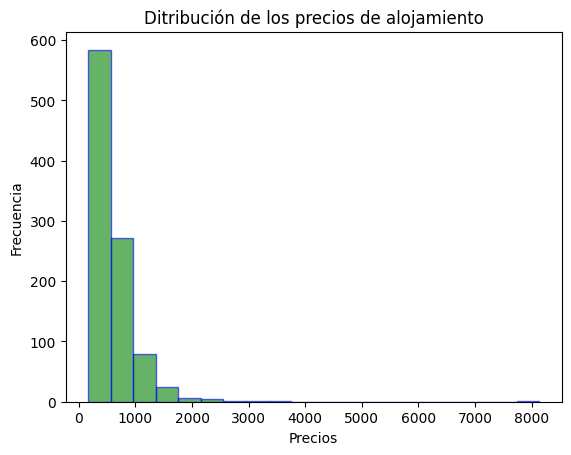

In [53]:
plt.hist(real_sum_np, color = 'green', bins = 20, edgecolor = 'blue', alpha = 0.6)
plt.title('Ditribución de los precios de alojamiento')
plt.xlabel('Precios')
plt.ylabel('Frecuencia')
plt.show()

Podemos identificar que los precios mayormente son mas frecuentes para precios bajos, adiconalmentea medida que va aumentando se puede identificar que baja la frecuencia entre mas alto es el precio.

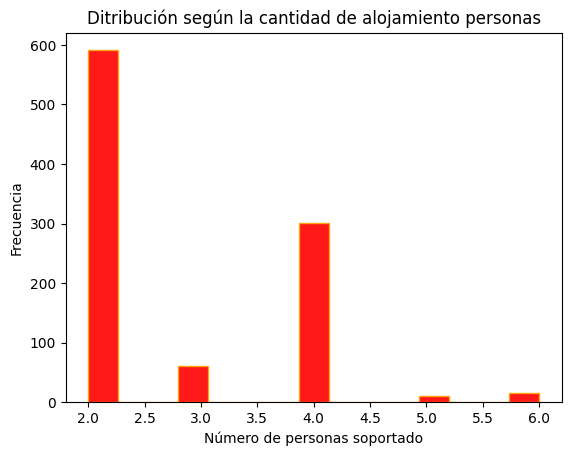

In [54]:
plt.hist(person_capacity_np, color = 'red', bins = 15, edgecolor = 'orange', alpha = 0.9)
plt.title('Ditribución según la cantidad de alojamiento personas')
plt.xlabel('Número de personas soportado')
plt.ylabel('Frecuencia')
plt.show()

Podemos ver que mayormente los alojamientos son para dos o 4 personas

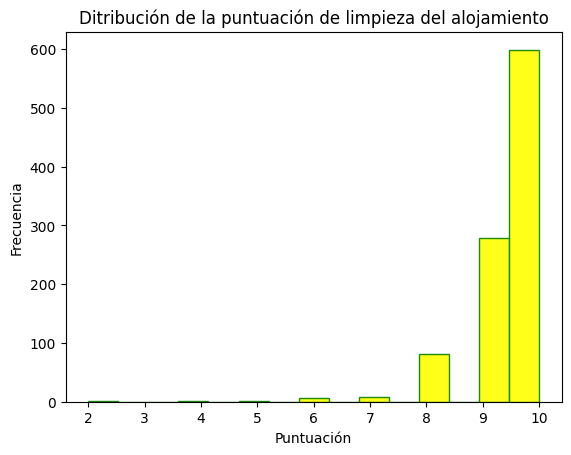

In [56]:
plt.hist(cleanliness_rating_np, color = 'yellow', bins = 15, edgecolor = 'green', alpha = 0.9)
plt.title('Ditribución de la puntuación de limpieza del alojamiento')
plt.xlabel('Puntuación')
plt.ylabel('Frecuencia')
plt.show()


Se puede apreciar que para la mayoría de alojamiento la calificación en limpieza es alta, agrupandose mayormente entre 9 y 10

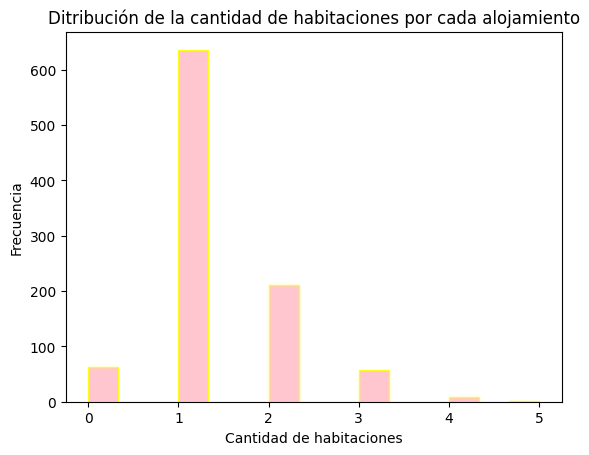

In [80]:
plt.hist(bedrooms_np, color = 'pink', bins = 15, edgecolor = 'yellow', alpha = 0.9)
plt.title('Ditribución de la cantidad de habitaciones por cada alojamiento')
plt.xlabel('Cantidad de habitaciones')
plt.ylabel('Frecuencia')
plt.show()

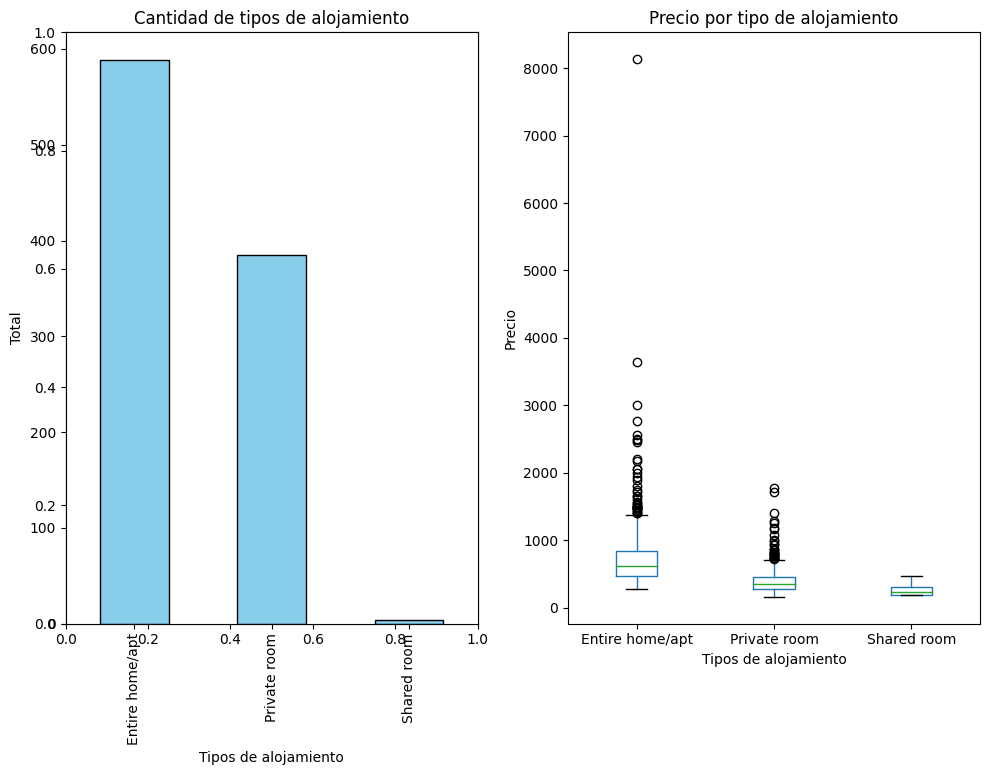

In [85]:
gs = gridspec.GridSpec(1,2,width_ratios=[1,1])
fig = plt.figure(figsize =(10,8))

### Primer grafico
ax1 = fig.add_subplot(gs[0,0])
ax1.quantity_by_type = df.groupby('room_type')['realSum'].count().sort_values(ascending=False)
ax1 = fig.add_subplot(gs[0,0])
quantity_by_type.plot(kind='bar', ax=ax1, color='skyblue', edgecolor='black')
ax1.set_title('Cantidad de tipos de alojamiento')
ax1.set_xlabel('Tipos de alojamiento')
ax1.set_ylabel('Total')

### Segundo grafico
ax2 = fig.add_subplot(gs[0, 1])
df.boxplot(column='realSum', by='room_type', ax=ax2, grid=False)
ax2.set_title('Precio por tipo de alojamiento')
ax2.set_xlabel('Tipos de alojamiento')
ax2.set_ylabel('Precio')



plt.suptitle('')
plt.tight_layout()
plt.show()

Por medio de estos último graficos podemos ver, que en mayor cantidad los alojamientos enteros son mas, seguidos por los alojamientos privados y posteriormente los compartidos, adiconalmente a la derecha encontramos un diagrama de cajas que nos permite ver que los precios, son también mas altos para los alojamientos enteros, seguidos de los alojamientos privados y finalmente los alojamientos compartidos, seguido de ello, se puede apreciar que tanto el alojamiento entero, como el alojamiento privado presentan valores atipicos, que reflejan que de estas categorias hay valores mucho mas superiores al promedio y al cuarto quartil.